<IPython.core.display.Javascript object>


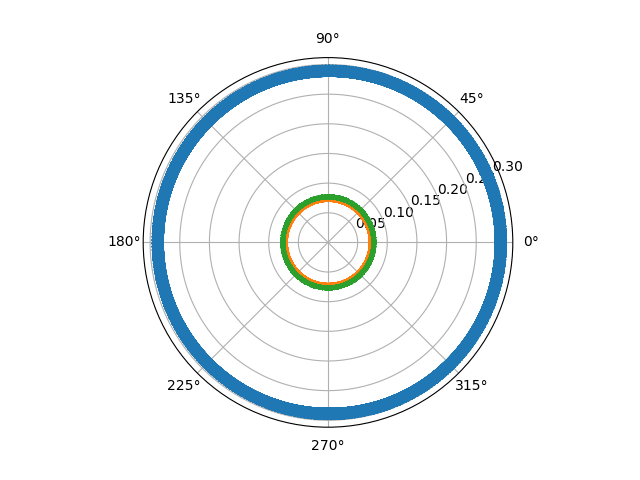

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from celmech.hamiltonian import AndoyerHamiltonian
import numpy as np

class Clicker(object):
    def __init__(self, k, Phiprime):
        self.ax = plt.subplot('111', projection='polar')
        self.k = k
        self.Phiprime = Phiprime
        self.cid = self.ax.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        phi = event.xdata
        Phi = event.ydata
        H = AndoyerHamiltonian(self.k,self.Phiprime,Phi,phi)
        tmax=100
        Nout = 1000
        times = np.linspace(0, tmax, Nout)
        sol = np.zeros((2, Nout))
        for i, time in enumerate(times):
            H.integrate(time)
            sol[:,i] = H.integrator.y
        self.ax.plot(sol[1,:], sol[0,:])
        ax.set_rlim(0,20)

clicker = Clicker(2, 132.6667)

<IPython.core.display.Javascript object>


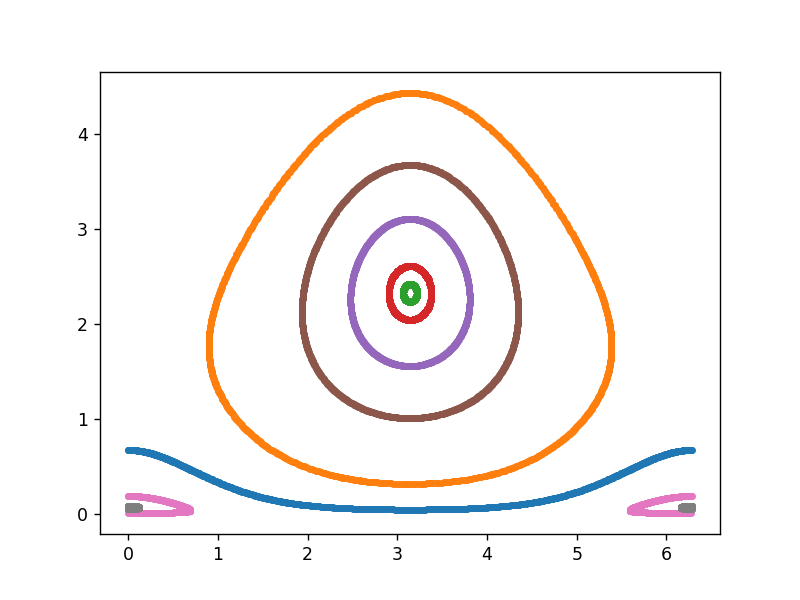

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from celmech.hamiltonian import AndoyerHamiltonian
import numpy as np

def wrap(val):
    while val < 0:
        val += 2*np.pi
    while val > 2*np.pi:
        val -= 2*np.pi
    return val

npwrap = np.vectorize(wrap)

class Clicker(object):
    def __init__(self, k, Phiprime):
        self.ax = plt.subplot('111')
        self.k = k
        self.Phiprime = Phiprime
        self.cid = self.ax.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        phi = event.xdata
        Phi = event.ydata
        if Phi < 0:
            return
        H = AndoyerHamiltonian(self.k,self.Phiprime,Phi,phi)
        tmax=100
        Nout = 1000
        times = np.linspace(0, tmax, Nout)
        sol = np.zeros((2, Nout))
        for i, time in enumerate(times):
            H.integrate(time)
            sol[:,i] = H.integrator.y
        self.ax.plot(npwrap(sol[1,:]), sol[0,:], '.')

clicker = Clicker(1, 2)